In [1]:
import torch

w = torch.empty(3, 5)
torch.nn.init.xavier_uniform_(w, gain=torch.nn.init.calculate_gain('tanh'))

tensor([[-0.1331, -0.2402,  0.8236, -0.1792, -1.2627],
        [ 1.3137,  0.0817, -1.2310, -0.3262, -0.4252],
        [ 1.3391,  0.7300, -1.1224, -1.3125, -0.2541]])

In [250]:
def init(module, weight_init, bias_init, gain=1):
    weight_init(module.weight.data, gain=gain)
    bias_init(module.bias.data)
    return module
init_ = lambda m: init(m, torch.nn.init.orthogonal_, lambda x: torch.nn.init.constant_(x, 0), np.sqrt(2))
l = init_(torch.nn.Linear(3, 5))
l.weight

Parameter containing:
tensor([[ 0.1562, -1.3032, -0.4418],
        [-0.5395,  0.2274, -0.9939],
        [ 1.1496,  0.3956, -0.4242],
        [-0.1234, -0.1706,  0.7735],
        [ 0.5896, -0.2538,  0.1968]], requires_grad=True)

In [257]:
n_tot = 10000
t = np.zeros(n_tot)
for i in range(n_tot):
    s = (0.001 - 0.2) * torch.rand(1).item() + 0.2
    t[i] = np.random.normal(0, s**(1/2))
np.mean((t-0)**2)

0.10171076109336696

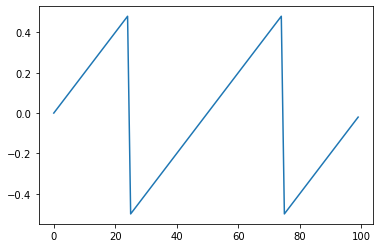

In [101]:
def f_sawtooth(x, period=50):
    saw_tooth = 2 * (x / period - np.floor(0.5 + x / period))
    saw_tooth = (0.5 - (-0.5)) / (1 - (-1)) * (saw_tooth - 1) + 0.5
    return saw_tooth
x = np.arange(100)
plt.plot(x, f_sawtooth(x, 50))

In [277]:
t = [-11.75, -10.75, -31.0, -6.75, -29.25, -29.25, -5.0, -10.0, -11.0, -7.0, -31.25, -10.75, -7.25, -8.0, -2.75, -7.5, -4.0, -6.25, -10.0, -4.5, -10.0, -5.0, -4.25, -6.5, -6.5, -6.75, -31.0, -4.25, -6.0, -5.25, -7.5, -4.5, -6.0, -3.25, -6.5, -6.75, -6.0, -6.5, -6.75, -7.75, -7.5, -7.5, -6.0, -9.75, -8.25, -6.25, -5.25, -8.75, -8.75, -8.0, -9.0, -13.5, -11.0, -11.0, -8.5, -11.5, -9.5, -8.25, -12.5, -10.0, -8.75, -7.5, -12.0, -11.0, -7.0, -9.0, -13.75, -9.25, -11.5, -14.0, -32.0, -10.75, -6.5, -9.75, -12.75,-8.0, -11.25, -10.75, -5.0, -14.5, -13.5, -9.25, -9.25, -9.75, -14.75, -12.75, -12.75, -11.25, -16.5, -8.5, -12.75, -32.25, -11.25, -13.0, -17.0, -15.75, -11.75, -12.75, -16.0, -8.25, -9.5, -9.5, -13.25, -13.25, -10.5, -10.75, -8.75, -16.5, -8.25, -30.25, -38.0, -9.0, -11.0, -9.75, -32.75, -10.75, -10.25, -11.5, -8.0, -5.25, -12.0, -8.25, -13.5,-4.25, -8.25, -9.5, -9.75, -8.0, -7.0, -57.0, -5.0, -8.5, -9.5, -8.75, -31.25, -7.25, -6.25, -7.5, -7.25, -6.25, -4.0, -31.25, -5.5, -4.0, -4.0, -6.0, -2.5, -6.0, -31.5, -3.0, -5.5, -4.0, -4.0, -28.75, -3.0, -4.0, -2.75, -4.5, -3.5, -5.5, -4.25, -3.25, -5.75, -5.5, -5.5, -3.25, -5.5, -5.75, -7.25, -4.75, -6.25, -31.5, -6.0, -9.0, -8.0, -7.75, -9.0, -32.5, -8.0, -9.5, -6.5, -9.0, -31.0, -6.25, -14.25, -2.5, -14.75, -9.5, -7.75, -34.0, -13.5, -10.75, -6.5, -34.5, -9.25, -32.75, -12.0, -12.5, -10.25, -7.75, -8.0, -10.75, -12.0, -14.0, -8.75, -14.25, -15.25, -13.75, -35.5, -9.25, -11.75, -10.0, -9.75, -14.0, -10.75, -11.75, -9.0, -12.75, -9.25, -13.25, -13.25, -14.5, -8.0, -5.0, -14.5, -12.75, -14.0, -10.0, -10.75, -13.0, -7.0, -13.5, -13.25, -13.25, -11.25, -9.5, -10.75, -10.0, -10.5, -36.75, -7.25, -14.0, -11.5, -6.5, -4.75, -11.0, -7.0, -13.0, -5.5, -9.5, -9.25, -10.0, -8.75, -6.25, -31.0, -8.25, -11.0, -7.75, -8.5, -5.5, -5.0, -29.0, -9.0, -5.5, -6.75, -31.75, -8.0, -6.0, -30.5, -6.5, -6.75, -6.5, -8.25, -5.5, -6.5, -1.25, -3.75, -3.0, -4.5, -3.25, -3.5, -3.5, -4.25, -4.25, -5.5, -2.0, -29.0, -3.5, -3.75, -5.0, -6.25, -6.5, -6.0, -29.0, -5.25, -5.25, -7.5, -4.5, -10.25, -6.75]


In [245]:
import pickle
objects = []
with (open("../result/metatest/minigolf3/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

folder = "result/metatest/minigolf/"
env_name = "gym_sin:minigolf-v0"
folder_list = ["result/golf_fixed_final/ours/",
               "result/golf_fixed_final/tsopt/",
               "result/golf_fixed_final/rl2low/"]
algo_list = ['ours', 'ts_opt', 'rl2']
label_list = ['ours', 'ts_opt', 'rl2']
has_track_list = [True, True, False]
store_history_list = [True, True, False]
prior_var_min = 0.001
prior_var_max = 0.2
noise_seq_var = 0.001
min_action = 1e-5
max_action = 10.
action_space = spaces.Box(low=min_action,
                          high=max_action,
                          shape=(1,))

num_seq = 2
seq_len_list = [100, 110]
sequence_name_list = ['sin', 'sawtooth']


def f_sin(x, freq=0.1, offset=-0.7, a=-0.2):
    t = a * np.sin(freq * x) + offset
    return t


def f_sawtooth(x, period=50):
    saw_tooth = 2 * (x / period - np.floor(0.5 + x / period))
    saw_tooth = (-0.6 - (-1)) / (1 - (-1)) * (saw_tooth - 1) - 0.6
    return saw_tooth


def get_sin_task_sequence_full_range(n_restarts, num_test_processes, std):
    kernel = C(1) * RBF(1) + WhiteKernel(0.01, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[0.], [0.2 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, 100):
        friction = f_sin(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sawtooth_wave(n_restarts, num_test_processes, std):
    kernel = C(1) * RBF(1) + WhiteKernel(0.01, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[0.], [0.2 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, 110):
        friction = f_sawtooth(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_sin, prior_seq_sin, init_prior_sin = get_sin_task_sequence_full_range(n_restarts, num_test_processes, std)
    gp_list_saw, prior_seq_saw, init_prior_saw = get_sawtooth_wave(n_restarts, num_test_processes, std)

    # Fill lists
    p = [prior_seq_sin, prior_seq_saw]
    gp = [gp_list_sin, gp_list_saw]
    ip = [init_prior_sin, init_prior_saw]
    return p, gp, ip


# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=1,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
view_results_real([o[0], o[1]], ['algo', 'ts'], [True, True], len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=[0.01, 2],
             dump_data=True,
             save_fig=True,
             folder=folder_path_with_date,
             view_tracking=True)

In [165]:
len(o)

3

(20, 8, 2)
(20, 8, 2)


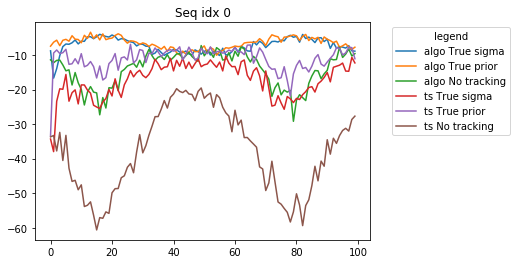

Here


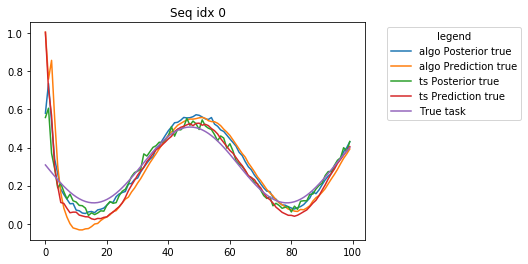

(20, 8, 2)
(20, 8, 2)


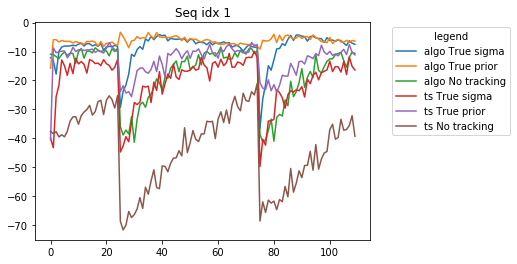

Here


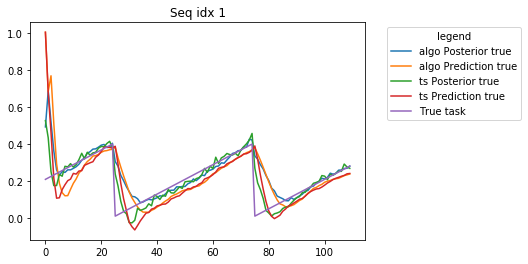

In [11]:
import matplotlib.pyplot as plt
def view_results_real(r_list, label_list, has_track_list, num_seq, prior_seqs, init_priors,
                 save_fig, folder, dump_data, rescale_latent=None, view_tracking=False):
    if dump_data:
        with open("{}data_results.pkl".format(folder), "wb") as output:
            pickle.dump(r_list, output)

    for seq in range(num_seq):
        # View rewards
        for r, label, has_track in zip(r_list, label_list, has_track_list):
            r = np.array(r)
            if not has_track:
                r = np.array([r[i][seq] for i in range(r.shape[0])])
                plt.plot(np.mean(r, 0), label=label)
                print("Seq {} Algo {} = {} +- {}".format(seq, label, np.mean(r), np.std(r)))
            else:
                t = np.array([r[p, 0, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " True sigma")
                print("Seq {} Algo {} = {} +- {}".format(seq, label, np.mean(t), np.std(t)))
                
                t = np.array([r[p, 1, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " False sigma")

                t = np.array([r[p, 2, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " True prior")

                t = np.array([r[p, 3, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " No tracking")

        plt.title("Seq idx {}".format(seq))
        plt.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        if save_fig:
            plt.savefig("{}seq_{}_reward".format(folder, seq))
        plt.show()
        print("Here")
        if view_tracking:
            # View tracking
            for r, label, has_track in zip(r_list, label_list, has_track_list):
                r = np.array(r)
                if has_track:
                    seq_len = len(prior_seqs[seq])
                    x = np.arange(seq_len)

                    t = np.array([r[p, 4, seq][:, 0, 0].tolist() for p in range(r.shape[0])])
                    if rescale_latent is not None:
                        t = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t - 1) + rescale_latent[1]
                    plt.plot(x, np.mean(t, 0), label=label + " Posterior true")

                    t = np.array([r[p, 6, seq][:, 0, 0].tolist() for p in range(r.shape[0])])
                    if rescale_latent is not None:
                        t = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t - 1) + rescale_latent[1]
                    plt.plot(x, np.mean(t, 0), label=label + " Posterior false")

                    t = np.array([r[p, 5, seq] for p in range(r.shape[0])])
                    t = np.mean(t, 0)
                    t2 = np.zeros(t.shape[0])
                    t2[1:] = t[:-1]
                    t2[0] = init_priors[seq][0][0].item()
                    if rescale_latent is not None:
                        t2 = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t2 - 1) + rescale_latent[1]
                    plt.plot(x, t2, label=label + " Prediction true")

                    t = np.array([r[p, 7, seq] for p in range(r.shape[0])])
                    t = np.mean(t, 0)
                    t2 = np.zeros(t.shape[0])
                    t2[1:] = t[:-1]
                    t2[0] = init_priors[seq][0][0].item()
                    if rescale_latent is not None:
                        t2 = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t2 - 1) + rescale_latent[1]
                    plt.plot(x, t2, label=label + " Posterior false")

            num_t = len(prior_seqs[seq])
            true_task = np.array([prior_seqs[seq][i][0].item() for i in range(num_t)])
            if rescale_latent is not None:
                true_task = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (true_task - 1) + \
                            rescale_latent[1]
            plt.plot(true_task, label="True task")

            plt.title("Seq idx {}".format(seq))
            plt.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')
            if save_fig:
                plt.savefig("{}seq_{}_tracking".format(folder, seq))
            plt.show()


In [35]:
import pickle
objects = []
with (open("../result/metatest/gauss/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

Seq 0 Algo ours = 11.922242306333334 +- 1.932562104926381
Seq 0 Algo ts_opt = 10.803218717833333 +- 1.0850663702131218
Seq 0 Algo rl2 = 4.416967209166666 +- 1.3348533573170571


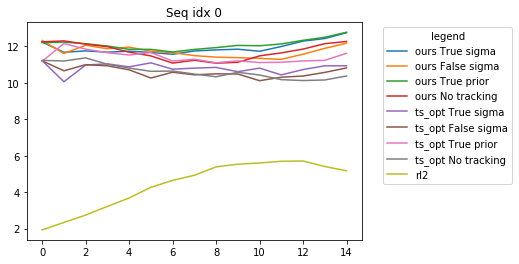

Here


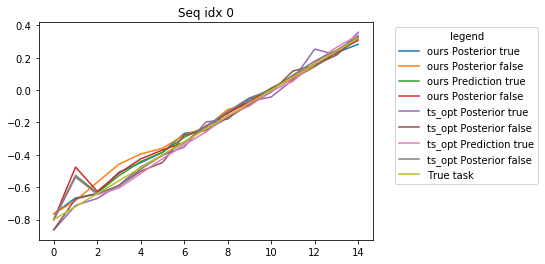

Seq 1 Algo ours = 11.79981656875 +- 1.4445032290935194
Seq 1 Algo ts_opt = 10.631339263125001 +- 1.0677896261500657
Seq 1 Algo rl2 = 5.6004502055 +- 0.3506133908897805


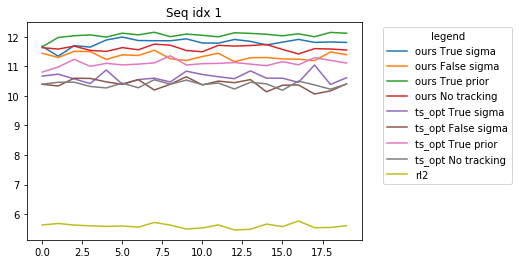

Here


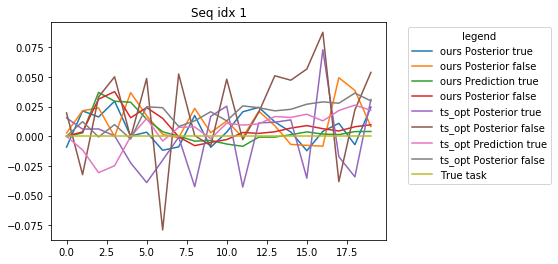

Seq 2 Algo ours = 11.942672176583333 +- 1.7294041982023205
Seq 2 Algo ts_opt = 10.729218341833333 +- 1.0243263541820848
Seq 2 Algo rl2 = 4.7900117904999995 +- 0.6199727809204065


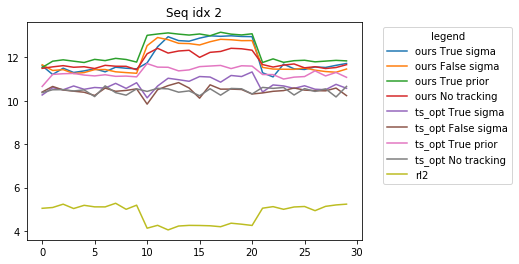

Here


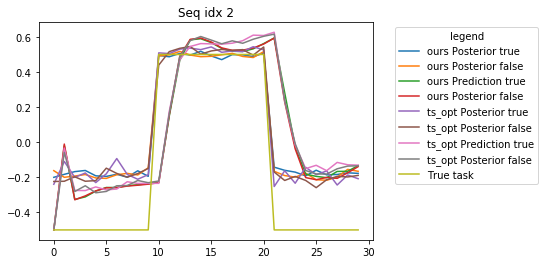

Seq 3 Algo ours = 11.513296912937498 +- 2.728061836406764
Seq 3 Algo ts_opt = 11.123445411125 +- 1.3706643590895067
Seq 3 Algo rl2 = 2.1996300818749996 +- 1.2278917960505258


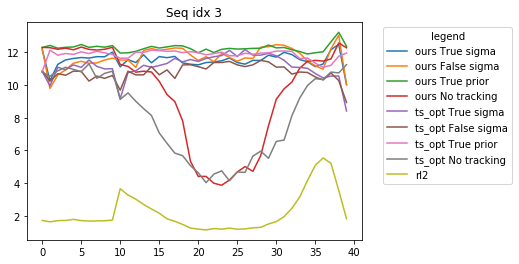

Here


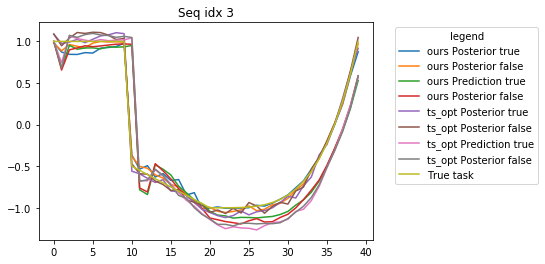

In [38]:
import custom_env
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.mini_golf_task_generator import MiniGolfTaskGenerator
from task.scaled_gauss_task_generator import ScaledGaussTaskGenerator
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args
folder = "result/metatest/scalegauss/"
env_name = "custom_env:scalegauss-v0"
folder_list = ["result/scalegauss_final/ours/",
               "result/scalegauss_final/tsopt/",
               "result/scalegauss_final/rl2/"]
algo_list = ['ours', 'ts_opt', 'rl2']
label_list = ['ours', 'ts_opt', 'rl2']
has_track_list = [True, True, False]
store_history_list = [True, True, False]
prior_var_min = 0.001
prior_var_max = 0.5
noise_seq_var = 0.001
latent_dim = 1
min_action = -1.
max_action = 1.
action_space = spaces.Box(low=min_action,
                          high=max_action,
                          shape=(1,))

num_seq = 4
seq_len_list = [15, 20, 30, 40]
sequence_name_list = ['linear', 'const', "doublestep", 'mix']


def f_double_step(x, y_min=-0.5, y_max=0.5, first_peak=10, second_peak=20):
    if x < first_peak or x > second_peak:
        return y_min
    return y_max


def f_linear(x, m=0.08, q=-0.8):
    return x * m + q


def f_const(x, const=0):
    return const


def f_mixture_changes(x):
    if x < 10:
        return 1
    elif 20 > x >= 10:
        return 0 - (x / 20)
    elif x >= 20:
        return -1 + np.power((x - 20), 4) / (130321 / 2)


def get_const_task_sequence(n_restarts, num_test_processes, std):
    kernel = C(1) * RBF(1) + WhiteKernel(0.1, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[f_const(0)], [0.2 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, 20):
        friction = f_const(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_linear_task_sequence(n_restarts, num_test_processes, std):
    kernel = C(1) * RBF(1) + WhiteKernel(0.1, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[f_linear(0)], [0.2 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, 15):
        friction = f_linear(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_double_step_sequences(n_restarts, num_test_processes, std):
    kernel = C(1) * RBF(1) + WhiteKernel(0.1, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[f_double_step(0)], [0.2 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, 30):
        friction = f_double_step(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_strange_sequences(n_restarts, num_test_processes, std):
    kernel = C(1) * RBF(1) + WhiteKernel(0.1, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[f_mixture_changes(0)], [0.2 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, 40):
        friction = f_mixture_changes(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_const, prior_seq_const, init_prior_const = get_const_task_sequence(n_restarts, num_test_processes, std)
    gp_list_lin, prior_seq_lin, init_prior_lin = get_linear_task_sequence(n_restarts, num_test_processes, std)
    gp_list_step, prior_seq_step, init_prior_step = get_double_step_sequences(n_restarts, num_test_processes, std)
    gp_list_mix, prior_seq_mix, init_prior_mix = get_strange_sequences(n_restarts, num_test_processes, std)

    # Fill lists
    p = [prior_seq_lin, prior_seq_const, prior_seq_step, prior_seq_mix]
    gp = [gp_list_lin, gp_list_const, gp_list_step, gp_list_mix]
    ip = [init_prior_lin, init_prior_const, init_prior_step, init_prior_mix]
    return p, gp, ip

prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=5,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
view_results_real(o, label_list, has_track_list, len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=None,
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=True)

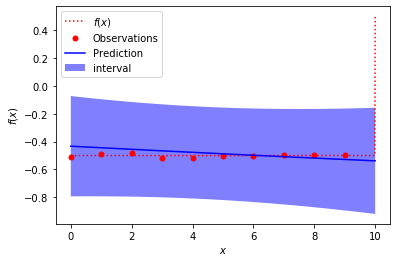

In [150]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, DotProduct, ConstantKernel as C

def f(x, y_min=-0.5, y_max=0.5, first_peak=10, second_peak=20):
    t = np.ones(x.shape[0]) * y_max
    t[(x < first_peak).squeeze(1)] = y_min
    t[(x > second_peak).squeeze(1)] = y_min
    return t


# Train on [0,1,...,H-1] and test on [0,1,...,H]
horizon = 10
# Noise standard deviation
sigma = 0.01
# Minimum prediction standard deviation
min_std = 0.1

x_train = np.atleast_2d(np.arange(horizon)).T
y_train = f(x_train).ravel()

y_train = y_train + np.random.randn(y_train.shape[0]) * sigma

x_test = np.atleast_2d(np.linspace(0, horizon, 1000)).T

kernel = C(1) * RBF(1) + WhiteKernel(min_std, noise_level_bounds="fixed") + DotProduct(1)
# kernel = C(1.0, constant_value_bounds="fixed") * RBF(1, length_scale_bounds="fixed")\
# + WhiteKernel(min_std, noise_level_bounds="fixed") + DotProduct(sigma_0=1, sigma_0_bounds="fixed")
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

gp.fit(x_train, y_train)

y_pred, sigma = gp.predict(x_test, return_std=True)

plt.figure()
plt.plot(x_test, f(x_test), 'r:', label=r'$f(x)$')
plt.plot(x_train, y_train, 'r.', markersize=10, label='Observations')
plt.plot(x_test, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x_test, x_test[::-1]]),
np.concatenate([y_pred - sigma,
(y_pred + sigma)[::-1]]),
alpha=.5, fc='b', ec='None', label='interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()

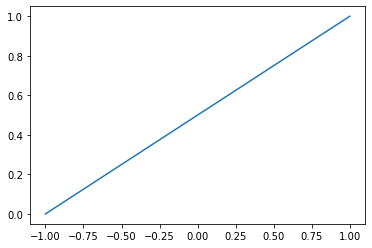

In [49]:
x = np.linspace(-1, 1, 100)
y = (1 - 0) / (1 - (-1)) * (x - 1) + 1
plt.plot(x, y)

In [56]:
np.where(y > 0.9)

(array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64),)

Seq 0 Algo rl2 = 650.1944475952 +- 247.31061875767057


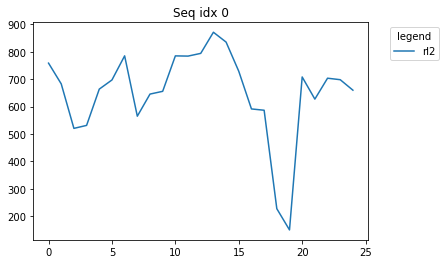

Here
Seq 1 Algo rl2 = 675.0096631040002 +- 234.27369124705595


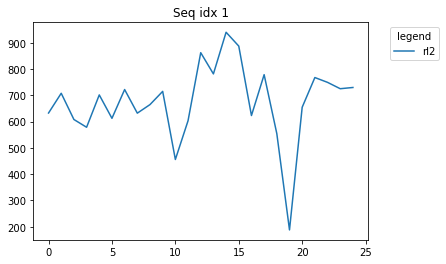

Here
Seq 2 Algo rl2 = 687.2618483616 +- 228.54028783595245


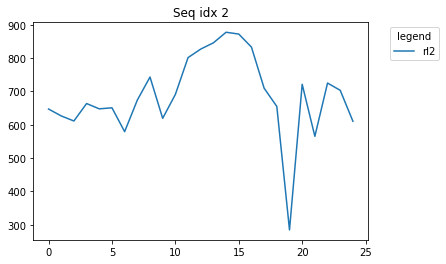

Here
Seq 3 Algo rl2 = 676.6090851476924 +- 201.05579372520603


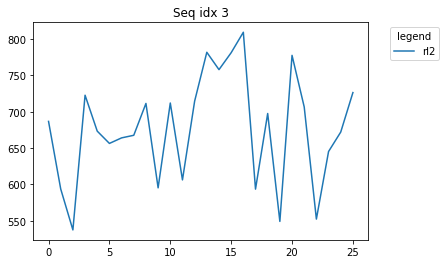

Here


In [54]:
import pickle
objects = []
with (open("../result/metatest/antlinear/rl2/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]


import gym_sin
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.ant_task_generator import AntTaskGenerator
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args

import warnings

warnings.filterwarnings(action='ignore')

folder = "result/metatest/ant/"
env_name = "gym_sin:antfrictionfull-v0"
folder_list = ["result/tempant/ours/", "result/tempant/rl2/", "result/tempant/tsopt/"]
algo_list = ['rl2']
label_list = ['rl2']
has_track_list = [False]
store_history_list = [False]

# Task family parameters
friction_var_min = 0.00001
friction_var_max = 0.4
noise_seq_var = 0.001
latent_dim = 8
high_act = np.ones(8, dtype=np.float32)
low_act = -np.ones(8, dtype=np.float32)
action_space = spaces.Box(low=low_act, high=high_act)

num_seq = 4
seq_len_list = [26, 25, 25, 25]
sequence_name_list = ['deteriorate0']


def check_leg_cond(i, leg_idx):
    if leg_idx == 0:
        return True if i == 0 or i == 1 else False
    elif leg_idx == 1:
        return True if i == 2 or i == 3 else False
    elif leg_idx == 2:
        return True if i == 4 or i == 5 else False
    elif leg_idx == 3:
        return True if i == 6 or i == 7 else False
    raise NotImplemented("Leg idx should be in [0, 3] but {} was found".format(leg_idx))


def get_decay_sequences(n_restarts, num_test_processes, var_seq, leg_idx):
    std = var_seq ** (1 / 2)
    kernel = C(1) * RBF(1) + WhiteKernel(0.01, noise_level_bounds="fixed") + DotProduct(1)
    gp_list = []

    for _ in range(latent_dim):
        curr_dim_list = []
        for _ in range(num_test_processes):
            curr_dim_list.append(GaussianProcessRegressor(kernel=kernel,
                                                          normalize_y=False,
                                                          n_restarts_optimizer=n_restarts))
        gp_list.append(curr_dim_list)

    # Creating prior distribution
    p_mean = []
    p_var = []
    for _ in range(latent_dim):
        p_mean.append(1)
        p_var.append(std ** 2)
    init_prior_test = [torch.tensor([p_mean, p_var], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    # Create prior sequence
    prior_seq = []
    for idx in range(26 if leg_idx == 0 else 25):
        p_mean = []
        p_var = []
        for i in range(latent_dim):
            if idx < 10 or idx >= 20:
                p_mean.append(1)
                p_var.append(std ** 2)
            elif 20 >= idx >= 10:
                if check_leg_cond(i=i, leg_idx=leg_idx):
                    p_mean.append(1 - (idx - 10) / 5)
                    p_var.append(std ** 2)
                else:
                    p_mean.append(1)
                    p_var.append(std ** 2)
        prior_seq.append(torch.tensor([p_mean, p_var], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_decay_1, prior_seq_decay_1, init_prior_decay_1 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx=0)
    gp_list_decay_2, prior_seq_decay_2, init_prior_decay_2 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx=1)
    gp_list_decay_3, prior_seq_decay_3, init_prior_decay_3 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx=2)
    gp_list_decay_4, prior_seq_decay_4, init_prior_decay_4 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx=3)

    # Fill lists
    p = [prior_seq_decay_1, prior_seq_decay_2, prior_seq_decay_3, prior_seq_decay_4]
    gp = [gp_list_decay_1, gp_list_decay_2, gp_list_decay_3, gp_list_decay_4]
    ip = [init_prior_decay_1, init_prior_decay_2, init_prior_decay_3, init_prior_decay_4]
    #p = [prior_seq_decay_1]
    #gp = [gp_list_decay_1]
    #ip = [init_prior_decay_1]
    
    return p, gp, ip


# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=5,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
r = view_results_multiple_dim([o[-1]], label_list, has_track_list, len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=None,
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=False,
                         num_dim=8)

In [57]:
(1 - 0) / (1 - (-1)) * (0.8 - 1) + 1

0.9

In [62]:
t = torch.arange(8)
idx = 3
t[idx * 2: idx * 2 + 2]

tensor([6, 7])

In [99]:
m = torch.rand((10,4))

In [219]:
import pickle
objects = []
with (open("../result/metatest/antlinear/ourslat/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

Seq 0 Algo rl2 = 394.9300858492308 +- 217.2337699459468


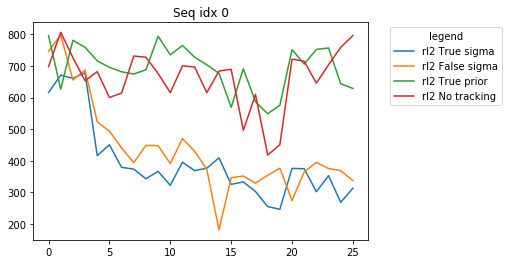

Here


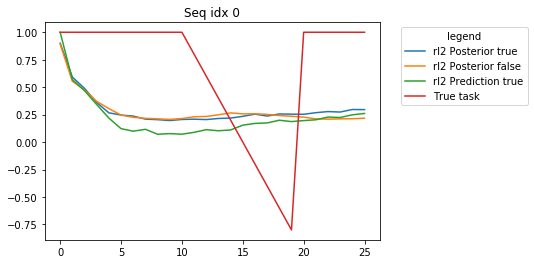

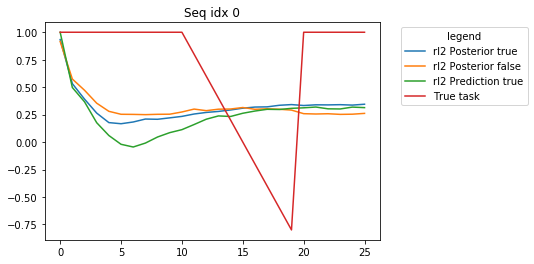

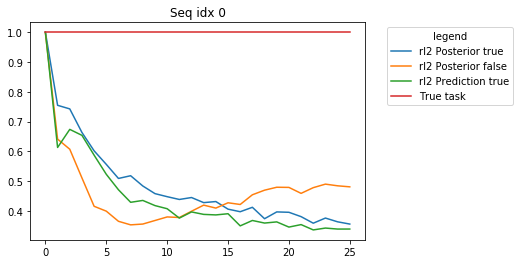

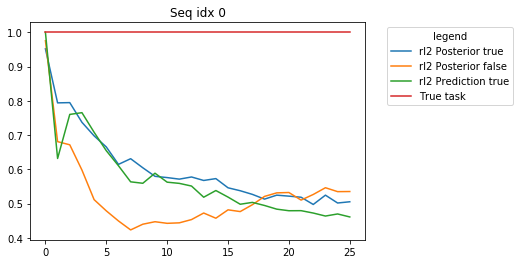

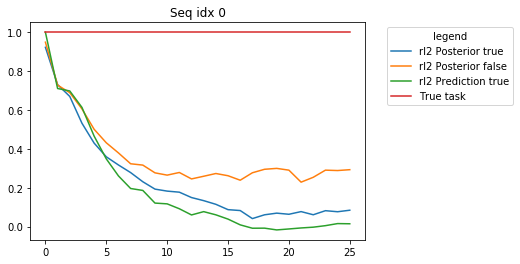

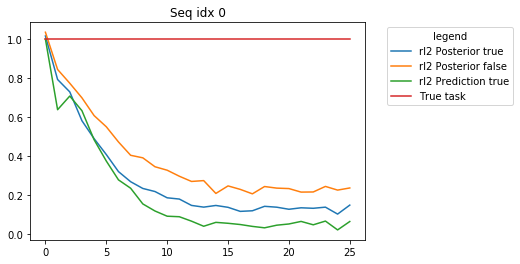

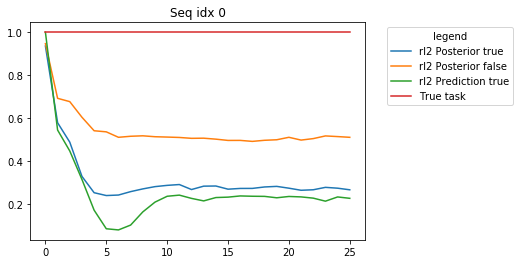

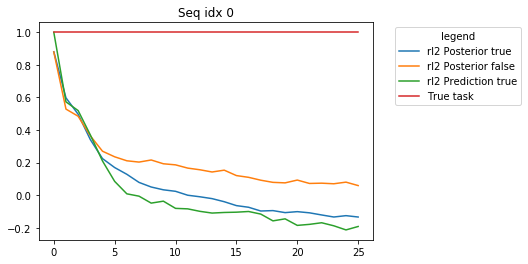

In [254]:
import gym_sin
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.ant_task_generator import AntTaskGenerator
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args

import warnings

warnings.filterwarnings(action='ignore')

folder = "result/metatest/ant/"
env_name = "gym_sin:antfrictionfull-v0"
folder_list = ["result/tempant/ours/", "result/tempant/rl2/", "result/tempant/tsopt/"]
algo_list = ['rl2']
label_list = ['rl2']
has_track_list = [True]
store_history_list = [True]

# Task family parameters
friction_var_min = 0.00001
friction_var_max = 0.4
noise_seq_var = 0.001
latent_dim = 8
high_act = np.ones(8, dtype=np.float32)
low_act = -np.ones(8, dtype=np.float32)
action_space = spaces.Box(low=low_act, high=high_act)

num_seq = 1
seq_len_list = [26]
sequence_name_list = ['deteriorate0']


def check_leg_cond(i, leg_idx):
    if leg_idx == 0:
        return True if i == 0 or i == 1 else False
    elif leg_idx == 1:
        return True if i == 2 or i == 3 else False
    elif leg_idx == 2:
        return True if i == 4 or i == 5 else False
    elif leg_idx == 3:
        return True if i == 6 or i == 7 else False
    raise NotImplemented("Leg idx should be in [0, 3] but {} was found".format(leg_idx))


def get_decay_sequences(n_restarts, num_test_processes, var_seq, leg_idx):
    std = var_seq ** (1 / 2)
    kernel = C(1) * RBF(1) + WhiteKernel(0.01, noise_level_bounds="fixed") + DotProduct(1)
    gp_list = []

    for _ in range(latent_dim):
        curr_dim_list = []
        for _ in range(num_test_processes):
            curr_dim_list.append(GaussianProcessRegressor(kernel=kernel,
                                                          normalize_y=False,
                                                          n_restarts_optimizer=n_restarts))
        gp_list.append(curr_dim_list)

    # Creating prior distribution
    p_mean = []
    p_var = []
    for _ in range(latent_dim):
        p_mean.append(1)
        p_var.append(std ** 2)
    init_prior_test = [torch.tensor([p_mean, p_var], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    # Create prior sequence
    prior_seq = []
    for idx in range(26 if leg_idx == 0 else 25):
        p_mean = []
        p_var = []
        for i in range(latent_dim):
            if idx < 10 or idx >= 20:
                p_mean.append(1)
                p_var.append(std ** 2)
            elif 20 >= idx >= 10:
                if check_leg_cond(i=i, leg_idx=leg_idx):
                    p_mean.append(1 - (idx - 10) / 5)
                    p_var.append(std ** 2)
                else:
                    p_mean.append(1)
                    p_var.append(std ** 2)
        prior_seq.append(torch.tensor([p_mean, p_var], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_decay_1, prior_seq_decay_1, init_prior_decay_1 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx=0)
    gp_list_decay_2, prior_seq_decay_2, init_prior_decay_2 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx=1)
    gp_list_decay_3, prior_seq_decay_3, init_prior_decay_3 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx=2)
    gp_list_decay_4, prior_seq_decay_4, init_prior_decay_4 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx=3)

    # Fill lists
    #p = [prior_seq_decay_1, prior_seq_decay_2, prior_seq_decay_3, prior_seq_decay_4]
    #gp = [gp_list_decay_1, gp_list_decay_2, gp_list_decay_3, gp_list_decay_4]
    #ip = [init_prior_decay_1, init_prior_decay_2, init_prior_decay_3, init_prior_decay_4]
    p = [prior_seq_decay_1]
    gp = [gp_list_decay_1]
    ip = [init_prior_decay_1]
    
    return p, gp, ip


# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=5,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
r = view_results_multiple_dim([o[0]], label_list, has_track_list, len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=None,
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=True,
                         num_dim=8)

In [36]:
0.05**(1/2)

0.22360679774997896

In [4]:
import matplotlib.pyplot as plt
def view_results_multiple_dim(r_list, label_list, has_track_list, num_seq, prior_seqs, init_priors,
                             save_fig, folder, dump_data, rescale_latent=None, view_tracking=False,
                             num_dim=None):
    if dump_data:
        with open("{}data_results.pkl".format(folder), "wb") as output:
            pickle.dump(r_list, output)

    for seq in range(num_seq):
        # View rewards
        for r, label, has_track in zip(r_list, label_list, has_track_list):
            r = np.array(r)
            if not has_track:
                r = np.array([r[i][seq] for i in range(r.shape[0])])
                plt.plot(np.mean(r, 0), label=label)
                print("Seq {} Algo {} = {} +- {}".format(seq, label, np.mean(r), np.std(r)))
            else:
                t = np.array([r[p, 0, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " True sigma")
                print("Seq {} Algo {} = {} +- {}".format(seq, label, np.mean(t), np.std(t)))
                
                t = np.array([r[p, 1, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " False sigma")

                t = np.array([r[p, 2, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " True prior")

                t = np.array([r[p, 3, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " No tracking")

        plt.title("Seq idx {}".format(seq))
        plt.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        if save_fig:
            plt.savefig("{}seq_{}_reward".format(folder, seq))
        plt.show()
        print("Here")
        if view_tracking:
            # View tracking
            for d in range(num_dim):
                for r, label, has_track in zip(r_list, label_list, has_track_list):
                    r = np.array(r)
                    if has_track:
                        seq_len = len(prior_seqs[seq])
                        x = np.arange(seq_len)
                        t = np.array([r[p, 4, seq][:, :, d].mean(1).tolist() for p in range(r.shape[0])])
                        if rescale_latent is not None:
                            t = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t - 1) + rescale_latent[1]
                        plt.plot(x, np.mean(t, 0), label=label + " Posterior true")

                        t = np.array([r[p, 6, seq][:, :, d].mean(1).tolist() for p in range(r.shape[0])])
                        if rescale_latent is not None:
                            t = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t - 1) + rescale_latent[1]
                        plt.plot(x, np.mean(t, 0), label=label + " Posterior false")
                        
                        t = np.array([r[p, 5, seq] for p in range(r.shape[0])])[:, :, d]
                        t = np.mean(t, 0)
                        t2 = np.zeros(t.shape[0])
                        t2[1:] = t[:-1]
                        t2[0] = init_priors[seq][0][0][d].item()
                        if rescale_latent is not None:
                            t2 = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t2 - 1) + rescale_latent[1]
                        plt.plot(x, t2, label=label + " Prediction true")

                        #t = np.array([r[p, 7, seq] for p in range(r.shape[0])])
                        #t = np.mean(t, 0)
                        #t2 = np.zeros(t.shape[0])
                        #t2[1:] = t[:-1]
                        #t2[0] = init_priors[seq][0][0].item()
                        #if rescale_latent is not None:
                        #    t2 = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t2 - 1) + rescale_latent[1]
                        #plt.plot(x, t2, label=label + " Posterior false")

                num_t = len(prior_seqs[seq])
                true_task = np.array([prior_seqs[seq][i][0][d].item() for i in range(num_t)])
                if rescale_latent is not None:
                    true_task = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (true_task - 1) + \
                                rescale_latent[1]
                plt.plot(true_task, label="True task")

                plt.title("Seq idx {}".format(seq))
                plt.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')
                if save_fig:
                    plt.savefig("{}seq_{}_tracking".format(folder, seq))
                plt.show()


In [39]:
import pickle
objects = []
with (open("../result/metatest/ant2leg/rl2/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

Seq 0 Algo rl2 = 769.33198472 +- 206.2520251563164


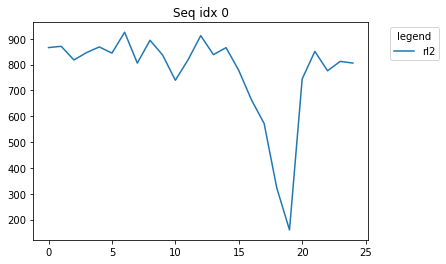

Here


In [51]:
import gym_sin
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.ant_task_generator_adv import AntTaskGeneratorAdvanced
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args

import warnings

warnings.filterwarnings(action='ignore')

folder = "result/metatest/ant/"
env_name = "gym_sin:antfrictionfull-v0"
# folder_list = ["result/ant2leg/ours/", "result/ant2leg/rl2/", "result/ant2leg/tsopt/"]
# algo_list = ['ours', 'rl2', 'ts_opt']
# label_list = ['ours', 'rl2', 'ts_opt']
# has_track_list = [True, False, True]
# store_history_list = [True, False, True]

folder_list = ["result/ant2leg/ours2leglat/"]
algo_list = ['rl2']
label_list = ['rl2']
has_track_list = [False]
store_history_list = [False]

# Task family parameters
friction_var_min_rnd = 0.3
friction_var_max_rnd = 0.5
friction_var_min_ok = 0.001
friction_var_max_ok = 0.1
noise_seq_var = 0.00001
latent_dim = 8
high_act = np.ones(8, dtype=np.float32)
low_act = -np.ones(8, dtype=np.float32)
action_space = spaces.Box(low=low_act, high=high_act)
prior_std_max = [friction_var_max_rnd ** (1 / 2) for _ in range(latent_dim)]
prior_std_min = [friction_var_min_ok ** (1 / 2) for _ in range(latent_dim)]

num_seq = 1
seq_len_list = [25]
sequence_name_list = ['deteriorate0']

def check_leg_cond_with_list(i, leg_idx_list):
    for leg in leg_idx_list:
        if leg == 0 and (i == 0 or i == 1):
            return True
        elif leg == 1 and (i == 2 or i == 3):
            return True
        elif leg == 2 and (i == 4 or i == 5):
            return True
        elif leg == 3 and (i == 6 or i == 7):
            return True
    return False


def get_decay_sequences(n_restarts, num_test_processes, var_seq, leg_idx_list, len):
    std = var_seq ** (1 / 2)
    kernel = C(1) * RBF(1) + WhiteKernel(0.05, noise_level_bounds="fixed") + DotProduct(1)
    gp_list = []

    for _ in range(latent_dim):
        curr_dim_list = []
        for _ in range(num_test_processes):
            curr_dim_list.append(GaussianProcessRegressor(kernel=kernel,
                                                          normalize_y=False,
                                                          n_restarts_optimizer=n_restarts))
        gp_list.append(curr_dim_list)

    # Creating prior distribution
    p_mean = []
    p_var = []
    for _ in range(latent_dim):
        p_mean.append(1)
        p_var.append(std ** 2)
    init_prior_test = [torch.tensor([p_mean, p_var], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    # Create prior sequence
    prior_seq = []
    for idx in range(len):
        p_mean = []
        p_var = []
        for i in range(latent_dim):
            if idx < 10 or idx >= 20:
                p_mean.append(1)
                p_var.append(std ** 2)
            elif 20 >= idx >= 10:
                if check_leg_cond_with_list(i=i, leg_idx_list=leg_idx_list):
                    p_mean.append(1 - (idx - 10) / 5)
                    p_var.append(std ** 2)
                else:
                    p_mean.append(1)
                    p_var.append(std ** 2)
        prior_seq.append(torch.tensor([p_mean, p_var], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test



def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_decay_1, prior_seq_decay_1, init_prior_decay_1 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[0, 1], len=25)
    gp_list_decay_2, prior_seq_decay_2, init_prior_decay_2 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[1, 2], len=25)
    gp_list_decay_3, prior_seq_decay_3, init_prior_decay_3 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[2, 3], len=25)
    gp_list_decay_4, prior_seq_decay_4, init_prior_decay_4 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[0, 3], len=26)

    # Fill lists
    # p = [prior_seq_decay_1, prior_seq_decay_2, prior_seq_decay_3, prior_seq_decay_4]
    # gp = [gp_list_decay_1, gp_list_decay_2, gp_list_decay_3, gp_list_decay_4]
    # ip = [init_prior_decay_1, init_prior_decay_2, init_prior_decay_3, init_prior_decay_4]
    p = [prior_seq_decay_1]
    gp = [gp_list_decay_1]
    ip = [init_prior_decay_1]

    return p, gp, ip
         
         
# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=5,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
r = view_results_multiple_dim([o[-1]], label_list, has_track_list, len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=None,
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=False,
                              num_dim=8)

Seq 0 Algo ours = 580.432712096 +- 209.83049524191944


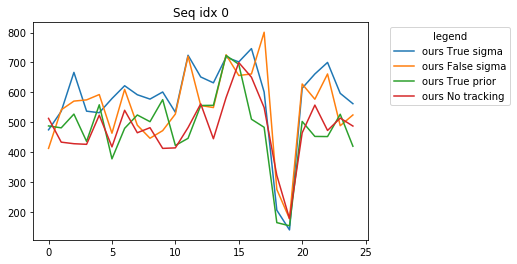

Here


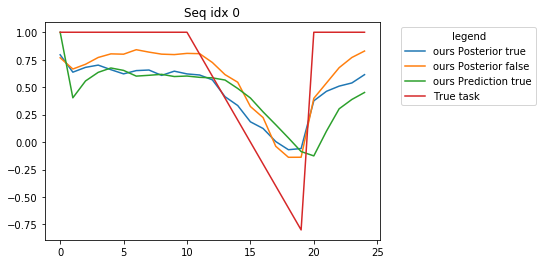

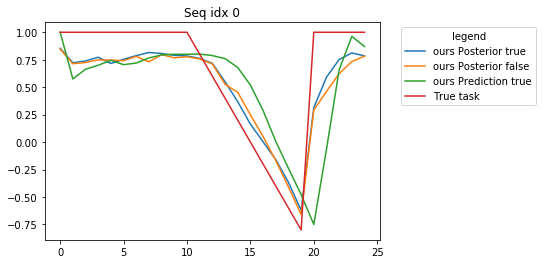

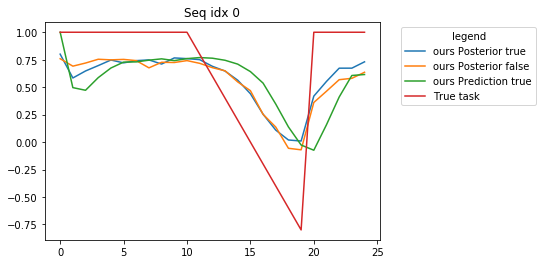

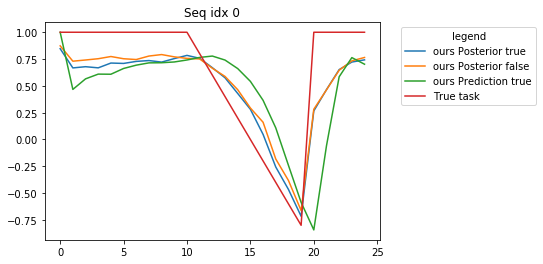

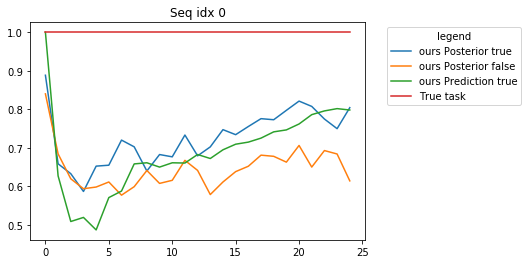

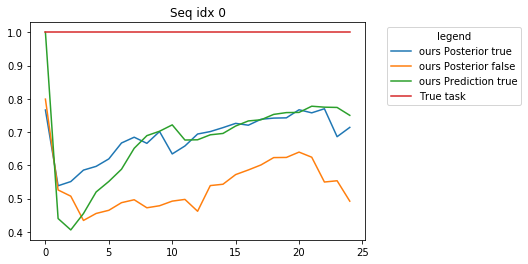

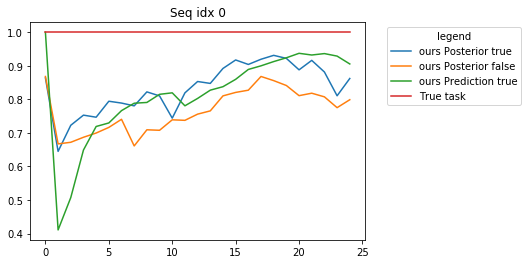

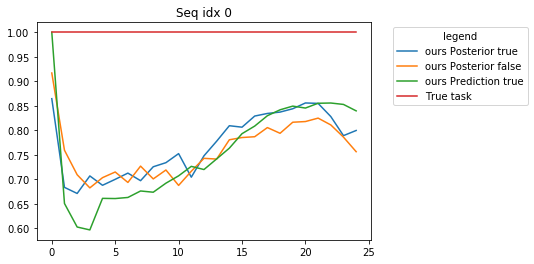

Seq 1 Algo ours = 602.3563388704 +- 205.6611340984938


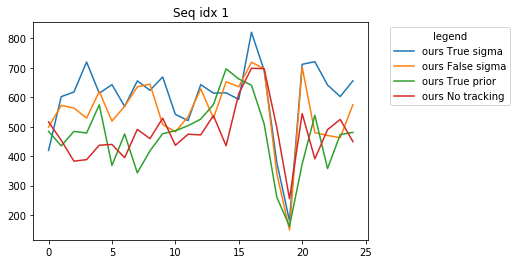

Here


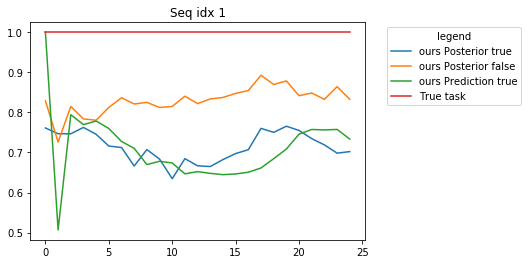

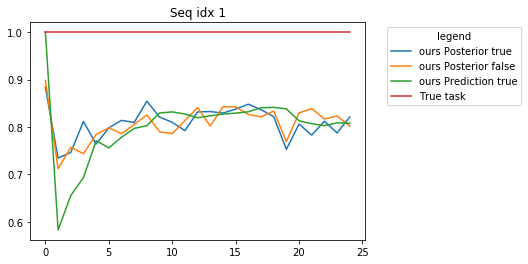

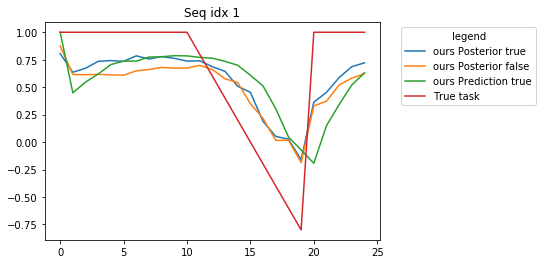

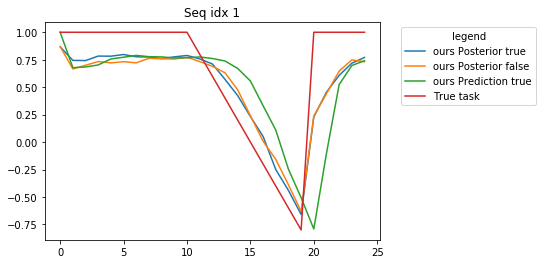

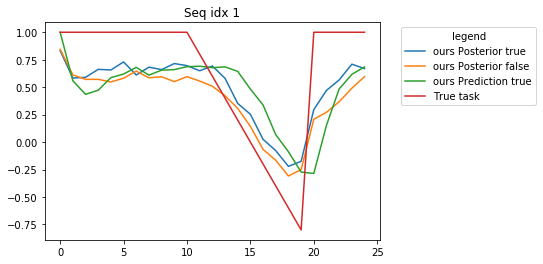

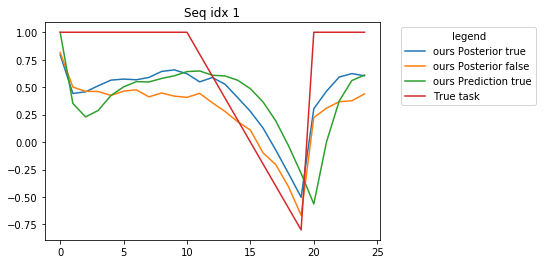

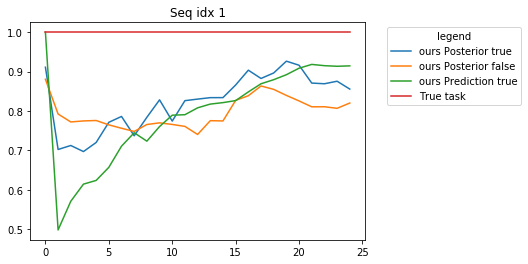

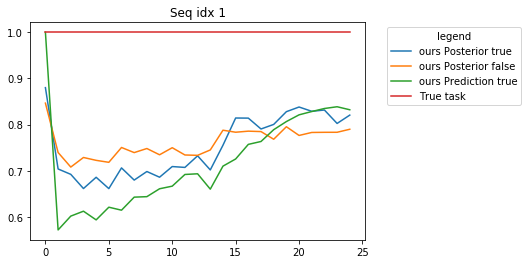

Seq 2 Algo ours = 608.0490791792001 +- 201.61604725635564


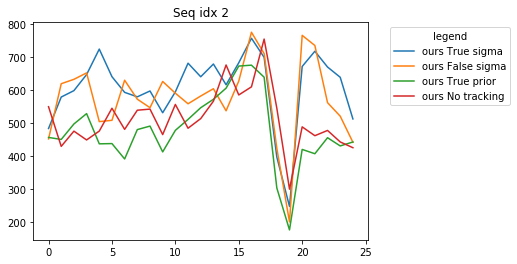

Here


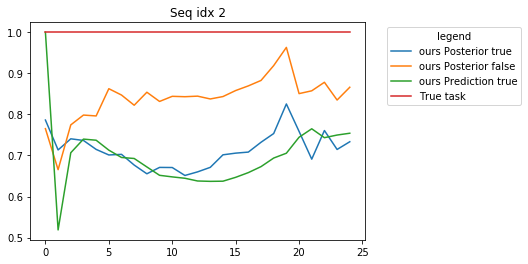

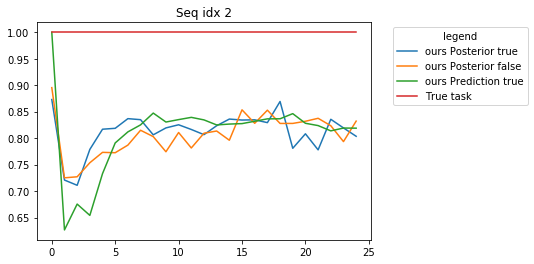

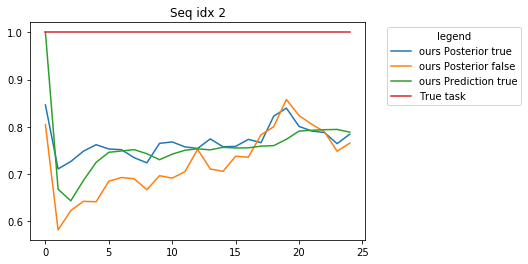

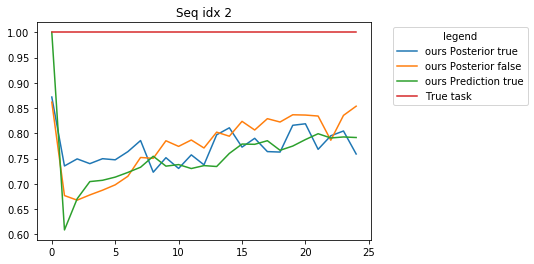

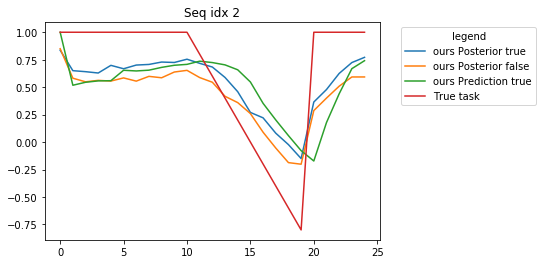

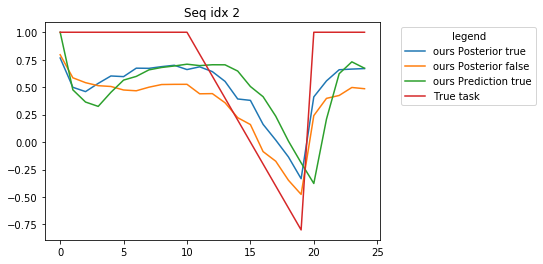

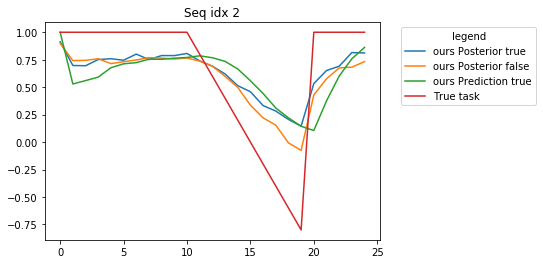

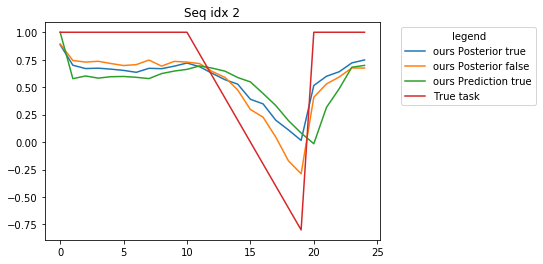

Seq 3 Algo ours = 571.1590025707692 +- 190.58086316844697


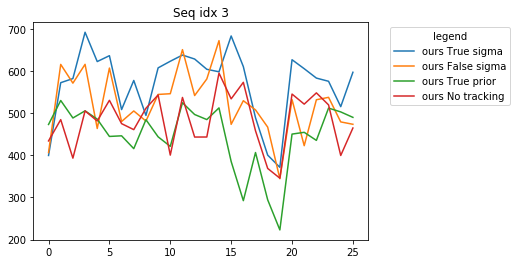

Here


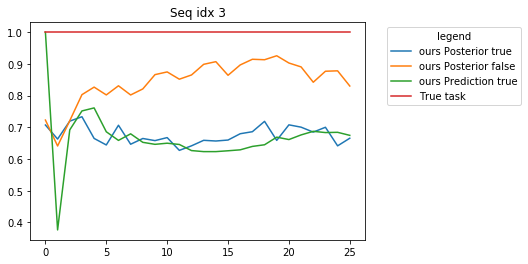

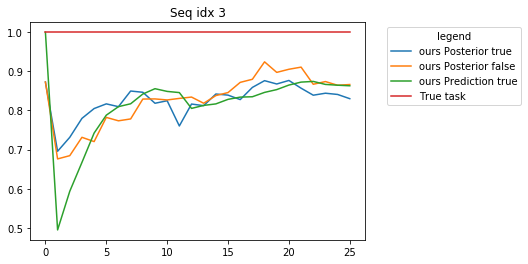

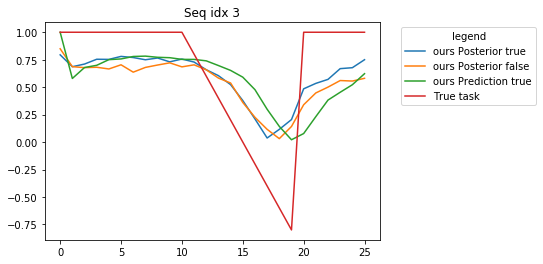

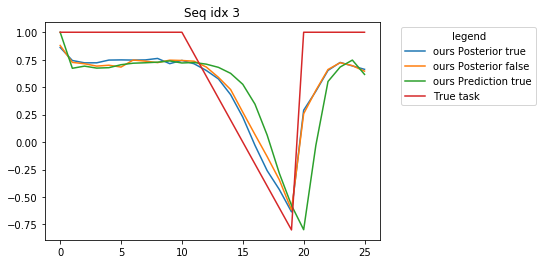

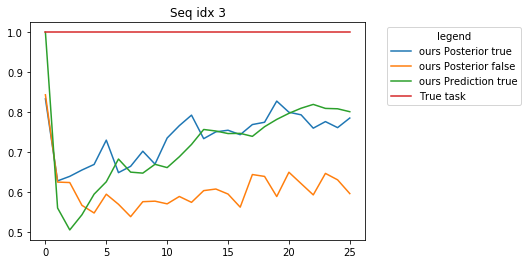

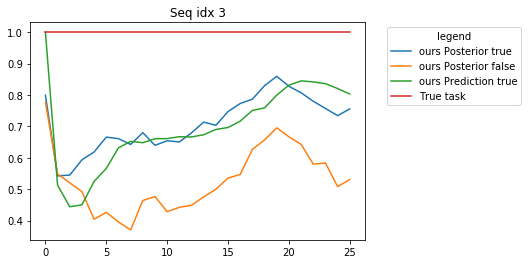

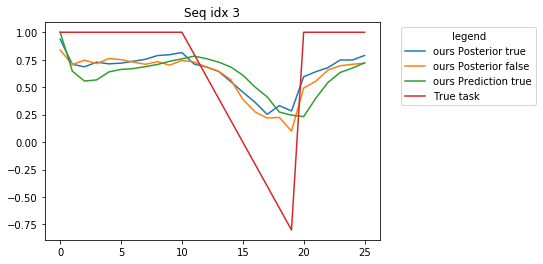

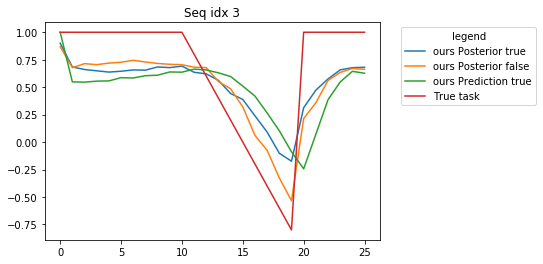

In [104]:
import gym_sin
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.ant_task_generator_adv import AntTaskGeneratorAdvanced
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args

import warnings

import pickle
objects = []
with (open("../result/metatest/antlinear/ourslat/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

warnings.filterwarnings(action='ignore')

folder = "result/metatest/ant/"
env_name = "gym_sin:antfrictionfull-v0"
# folder_list = ["result/ant2leg/ours/", "result/ant2leg/rl2/", "result/ant2leg/tsopt/"]
# algo_list = ['ours', 'rl2', 'ts_opt']
# label_list = ['ours', 'rl2', 'ts_opt']
# has_track_list = [True, False, True]
# store_history_list = [True, False, True]

folder_list = ["result/ant2leg/ours2leglat/"]
algo_list = ['ours']
label_list = ['ours']
has_track_list = [True]
store_history_list = [True]

# Task family parameters
friction_var_min_rnd = 0.3
friction_var_max_rnd = 0.5
friction_var_min_ok = 0.001
friction_var_max_ok = 0.1
noise_seq_var = 0.00001
latent_dim = 8
high_act = np.ones(8, dtype=np.float32)
low_act = -np.ones(8, dtype=np.float32)
action_space = spaces.Box(low=low_act, high=high_act)
prior_std_max = [friction_var_max_rnd ** (1 / 2) for _ in range(latent_dim)]
prior_std_min = [friction_var_min_ok ** (1 / 2) for _ in range(latent_dim)]

num_seq = 4
seq_len_list = [25, 25, 25, 26]
sequence_name_list = ['deteriorate0', 'det1', 'det2', 'det3']

def check_leg_cond_with_list(i, leg_idx_list):
    for leg in leg_idx_list:
        if leg == 0 and (i == 0 or i == 1):
            return True
        elif leg == 1 and (i == 2 or i == 3):
            return True
        elif leg == 2 and (i == 4 or i == 5):
            return True
        elif leg == 3 and (i == 6 or i == 7):
            return True
    return False


def get_decay_sequences(n_restarts, num_test_processes, var_seq, leg_idx_list, len):
    std = var_seq ** (1 / 2)
    kernel = C(1) * RBF(1) + WhiteKernel(0.05, noise_level_bounds="fixed") + DotProduct(1)
    gp_list = []

    for _ in range(latent_dim):
        curr_dim_list = []
        for _ in range(num_test_processes):
            curr_dim_list.append(GaussianProcessRegressor(kernel=kernel,
                                                          normalize_y=False,
                                                          n_restarts_optimizer=n_restarts))
        gp_list.append(curr_dim_list)

    # Creating prior distribution
    p_mean = []
    p_var = []
    for _ in range(latent_dim):
        p_mean.append(1)
        p_var.append(std ** 2)
    init_prior_test = [torch.tensor([p_mean, p_var], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    # Create prior sequence
    prior_seq = []
    for idx in range(len):
        p_mean = []
        p_var = []
        for i in range(latent_dim):
            if idx < 10 or idx >= 20:
                p_mean.append(1)
                p_var.append(std ** 2)
            elif 20 >= idx >= 10:
                if check_leg_cond_with_list(i=i, leg_idx_list=leg_idx_list):
                    p_mean.append(1 - (idx - 10) / 5)
                    p_var.append(std ** 2)
                else:
                    p_mean.append(1)
                    p_var.append(std ** 2)
        prior_seq.append(torch.tensor([p_mean, p_var], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test



def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_decay_1, prior_seq_decay_1, init_prior_decay_1 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[0, 1], len=25)
    gp_list_decay_2, prior_seq_decay_2, init_prior_decay_2 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[1, 2], len=25)
    gp_list_decay_3, prior_seq_decay_3, init_prior_decay_3 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[2, 3], len=25)
    gp_list_decay_4, prior_seq_decay_4, init_prior_decay_4 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[1, 3], len=26)

    # Fill lists
    p = [prior_seq_decay_1, prior_seq_decay_2, prior_seq_decay_3, prior_seq_decay_4]
    gp = [gp_list_decay_1, gp_list_decay_2, gp_list_decay_3, gp_list_decay_4]
    ip = [init_prior_decay_1, init_prior_decay_2, init_prior_decay_3, init_prior_decay_4]
    #p = [prior_seq_decay_1]
    #gp = [gp_list_decay_1]
    #ip = [init_prior_decay_1]

    return p, gp, ip
         
         
# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=5,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
r = view_results_multiple_dim([o[0]], label_list, has_track_list, len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=None,
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=True,
                              num_dim=8)

In [61]:
v = torch.multinomial(torch.tensor([1., 1.]), 5, replacement=True)
v

tensor([0, 1, 1, 1, 1])

In [68]:
400 * 16 * 20000

128000000

In [67]:
20000

20000

In [74]:
((1 - 0) / (1 - (-1))) * ((0.6) - 1) + 1

0.8

In [75]:
0.2 ** (1/2)

0.4472135954999579

In [87]:
import torch
from task.task_generator import TaskGenerator


class AntTaskGeneratorAdvanced(TaskGenerator):

    def __init__(self,
                 friction_var_min_rnd,
                 friction_var_max_rnd,
                 friction_var_max_ok,
                 friction_var_min_ok,
                 n_frictions=8):
        super(AntTaskGeneratorAdvanced, self).__init__()

        self.max_mean_ok = 1
        self.min_mean_ok = 0.6

        self.max_mean_rnd = 1
        self.min_mean_rnd = -1

        self.max_mean_broken = -0.6
        self.min_mean_broken = -1

        self.max_std_rnd = friction_var_max_rnd ** (1 / 2)
        self.min_std_rnd = friction_var_min_rnd ** (1 / 2)

        self.max_std_ok = friction_var_max_ok ** (1 / 2)
        self.min_std_ok = friction_var_min_ok ** (1 / 2)

        self.latent_dim = n_frictions

    def create_task_family(self, n_tasks, n_batches=1, test_perc=0, batch_size=160):
        raise NotImplemented

    def sample_task_from_prior(self, prior):
        ok = True

        while ok:
            mu = prior[0].clone().detach()
            var = prior[1].clone().detach()

            task_param = torch.normal(mu, var.sqrt())

            if torch.any(task_param > 1) | torch.any(task_param < -1):
                ok = True
            else:
                ok = False

        envs_kwargs = {'frictions': task_param.numpy()}

        return envs_kwargs

    def sample_pair_tasks(self, num_processes):
        # Compute how much of each task we want to sample
        v = torch.multinomial(torch.tensor([0.6, 0.4]), num_processes, replacement=True)
        num_rnd = (v == 0).sum().item()
        num_b = (v == 1).sum().item()

        # Sample tasks
        nt_rnd, mu_rnd, std_rnd = self.sample_rnd_leg_tasks(num_rnd)
        nt_b, mu_b, std_b = self.sample_broke_leg_tasks(num_b)

        # Merge tasks
        nt = torch.cat([nt_rnd, nt_b], 0)
        mu = torch.cat([mu_rnd, mu_b], 0)
        std = torch.cat([std_rnd, std_b], 0)

        perm = torch.randperm(num_processes)

        nt = nt[perm]
        mu = mu[perm]
        std = std[perm]

        prior = [torch.tensor([mu[i].tolist(), std[i].pow(2).tolist()]) for i in range(num_processes)]

        envs_kwargs = [{'frictions': nt[i].numpy()}
                       for i in range(num_processes)]

        return envs_kwargs, None, prior, nt

    def sample_ok_tasks(self, num_p):
        mu = (self.min_mean_ok - self.max_mean_ok) * torch.rand(num_p, self.latent_dim) + self.max_mean_ok
        std = (self.min_std - self.max_std) * torch.rand(num_p, self.latent_dim) + self.max_std

        new_t = self._sample(mu=mu,
                             std=std,
                             max_m=torch.ones(self.latent_dim, dtype=torch.float32) * self.max_mean_ok,
                             min_m=torch.ones(self.latent_dim, dtype=torch.float32) * self.min_mean_ok)

        return new_t, mu, std

    def sample_rnd_leg_tasks(self, num_p):
        rnd_leg_idx = torch.randint(low=0, high=4, size=(num_p,))
        rnd_leg_idx_2 = torch.randint(low=0, high=4, size=(num_p,))

        max_m = torch.ones(num_p, self.latent_dim) * self.max_mean_ok
        min_m = torch.ones(num_p, self.latent_dim) * self.min_mean_ok
        max_s = torch.ones(num_p, self.latent_dim) * self.max_std_ok
        min_s = torch.ones(num_p, self.latent_dim) * self.min_std_ok

        for p in range(num_p):
            # Rnd leg 1 - Mean
            max_m[p, rnd_leg_idx[p] * 2:  rnd_leg_idx[p] * 2 + 2] = self.max_mean_rnd
            min_m[p, rnd_leg_idx[p] * 2:  rnd_leg_idx[p] * 2 + 2] = self.min_mean_rnd

            # Rnd leg 1 - Std
            max_s[p, rnd_leg_idx[p] * 2:  rnd_leg_idx[p] * 2 + 2] = self.max_std_rnd
            min_s[p, rnd_leg_idx[p] * 2:  rnd_leg_idx[p] * 2 + 2] = self.min_std_rnd

            # Rnd leg 2 - Mean
            max_m[p, rnd_leg_idx_2[p] * 2:  rnd_leg_idx_2[p] * 2 + 2] = self.max_mean_rnd
            min_m[p, rnd_leg_idx_2[p] * 2:  rnd_leg_idx_2[p] * 2 + 2] = self.min_mean_rnd

            # Rnd leg 2 -Std
            max_s[p, rnd_leg_idx_2[p] * 2:  rnd_leg_idx_2[p] * 2 + 2] = self.max_std_rnd
            min_s[p, rnd_leg_idx_2[p] * 2:  rnd_leg_idx_2[p] * 2 + 2] = self.min_std_rnd

        mu = (min_m - max_m) * torch.rand(num_p, self.latent_dim) + max_m
        std = (min_s - max_s) * torch.rand(num_p, self.latent_dim) + max_s
        new_t = self._sample(mu=mu, std=std, max_m=max_m, min_m=min_m)

        for p in range(num_p):
            for leg in range(4):
                if leg != rnd_leg_idx[p] and leg != rnd_leg_idx_2[p]:
                    std[p, leg * 2: leg * 2 + 2] = (self.max_std_rnd - self.min_std_rnd) / (self.max_std_ok - self.min_std_ok) * (std[p, leg * 2: leg * 2 + 2] - self.max_std_ok) + self.max_std_rnd

        return new_t, mu, std

    def sample_broke_leg_tasks(self, num_p):
        broken_leg_idx = torch.randint(low=0, high=4, size=(num_p,))
        broken_leg_idx_2 = torch.randint(low=0, high=4, size=(num_p,))
        print("Broken idx {} {}".format(broken_leg_idx, broken_leg_idx_2))
        
        max_m = torch.ones(num_p, self.latent_dim) * self.max_mean_ok
        min_m = torch.ones(num_p, self.latent_dim) * self.min_mean_ok
        max_s = torch.ones(num_p, self.latent_dim) * self.max_std_ok
        min_s = torch.ones(num_p, self.latent_dim) * self.min_std_ok

        for p in range(num_p):
            # Rnd leg 1 - Mean
            max_m[p, broken_leg_idx[p] * 2:  broken_leg_idx[p] * 2 + 2] = self.max_mean_broken
            min_m[p, broken_leg_idx[p] * 2:  broken_leg_idx[p] * 2 + 2] = self.min_mean_broken

            # Rnd leg 2 - Mean
            max_m[p, broken_leg_idx_2[p] * 2:  broken_leg_idx_2[p] * 2 + 2] = self.max_mean_broken
            min_m[p, broken_leg_idx_2[p] * 2:  broken_leg_idx_2[p] * 2 + 2] = self.min_mean_broken

        mu = (min_m - max_m) * torch.rand(num_p, self.latent_dim) + max_m
        std = (min_s - max_s) * torch.rand(num_p, self.latent_dim) + max_s
        new_t = self._sample(mu=mu, std=std, max_m=max_m, min_m=min_m)

        std = (self.max_std_rnd - self.min_std_rnd) / (self.max_std_ok - self.min_std_ok) * (std - self.max_std_ok) + self.max_std_rnd
        print(new_t)
        return new_t, mu, std

    def _sample(self, mu, std, max_m, min_m):
        new_tasks = torch.normal(mu, std)
        not_ok_task = torch.any(new_tasks > max_m, 1) | torch.any(new_tasks < min_m, 1)

        while torch.sum(not_ok_task) != 0:
            temp_new_tasks = torch.normal(mu, std)

            new_tasks[not_ok_task, :] = temp_new_tasks[not_ok_task]
            not_ok_task = (
                    torch.any(new_tasks > max_m, 1) | torch.any(new_tasks < min_m, 1))

        return new_tasks


In [88]:
friction_var_min_rnd = 0.3
friction_var_max_rnd = 0.5
friction_var_min_ok = 0.001
friction_var_max_ok = 0.1
latent_dim = 8
gen = AntTaskGeneratorAdvanced(n_frictions=latent_dim,
                                              friction_var_max_ok=friction_var_max_ok,
                                              friction_var_min_ok=friction_var_min_ok,
                                              friction_var_max_rnd=friction_var_max_rnd,
                                              friction_var_min_rnd=friction_var_min_rnd)

In [108]:
gen.sample_pair_tasks(1)

Broken idx tensor([0]) tensor([1])
tensor([[-0.7085, -0.7965, -0.7073, -0.6963,  0.8806,  0.9032,  0.8244,  0.7111]])


([{'frictions': array([-0.7085461 , -0.7964957 , -0.7072854 , -0.69628143,  0.88055706,
           0.9031889 ,  0.8244004 ,  0.7110951 ], dtype=float32)}],
 None,
 [tensor([[-0.6066, -0.8703, -0.6455, -0.7247,  0.6675,  0.9949,  0.8142,  0.6929],
          [ 0.3957,  0.4984,  0.3442,  0.4088,  0.3411,  0.3291,  0.3249,  0.3069]])],
 tensor([[-0.7085, -0.7965, -0.7073, -0.6963,  0.8806,  0.9032,  0.8244,  0.7111]]))

In [103]:
gen.sample_task_from_prior(prior_sequences[-1][18])

{'frictions': array([-0.6778038 , -0.52962387,  0.9988759 ,  0.9773545 ,  0.95999503,
         0.92510545, -0.5702234 , -0.667164  ], dtype=float32)}

Seq 0 Algo rl2 = 326.043198814 +- 129.82937356165186


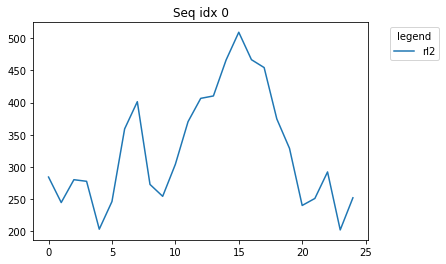

Here
Seq 1 Algo rl2 = 332.85574765800004 +- 134.27344517672466


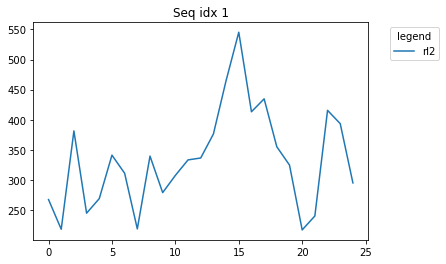

Here
Seq 2 Algo rl2 = 333.95471327000007 +- 125.53349379698851


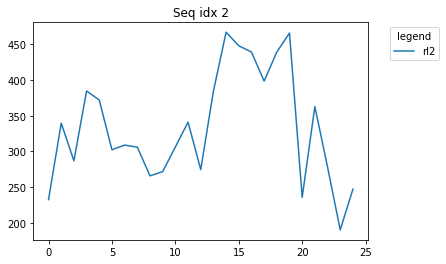

Here
Seq 3 Algo rl2 = 311.34799267403844 +- 131.94291734185492


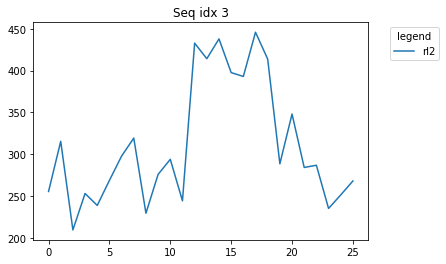

Here


In [113]:
import gym_sin
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.ant_task_generator_adv import AntTaskGeneratorAdvanced
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args

import warnings

import pickle
objects = []
with (open("../result/metatest/ant2leglinearfocus/rl2/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

warnings.filterwarnings(action='ignore')

folder = "result/metatest/ant/"
env_name = "gym_sin:antfrictionfull-v0"
# folder_list = ["result/ant2leg/ours/", "result/ant2leg/rl2/", "result/ant2leg/tsopt/"]
# algo_list = ['ours', 'rl2', 'ts_opt']
# label_list = ['ours', 'rl2', 'ts_opt']
# has_track_list = [True, False, True]
# store_history_list = [True, False, True]

folder_list = ["result/ant2leg/ours2leglat/"]
algo_list = ['rl2']
label_list = ['rl2']
has_track_list = [False]
store_history_list = [False]

# Task family parameters
friction_var_min_rnd = 0.3
friction_var_max_rnd = 0.5
friction_var_min_ok = 0.001
friction_var_max_ok = 0.1
noise_seq_var = 0.00001
latent_dim = 8
high_act = np.ones(8, dtype=np.float32)
low_act = -np.ones(8, dtype=np.float32)
action_space = spaces.Box(low=low_act, high=high_act)
prior_std_max = [friction_var_max_rnd ** (1 / 2) for _ in range(latent_dim)]
prior_std_min = [friction_var_min_ok ** (1 / 2) for _ in range(latent_dim)]

num_seq = 4
seq_len_list = [25, 25, 25, 26]
sequence_name_list = ['deteriorate0', 'deteriorate1', 'deteriorate2', 'deteriorate3']

def check_leg_cond_with_list(i, leg_idx_list):
    for leg in leg_idx_list:
        if leg == 0 and (i == 0 or i == 1):
            return True
        elif leg == 1 and (i == 2 or i == 3):
            return True
        elif leg == 2 and (i == 4 or i == 5):
            return True
        elif leg == 3 and (i == 6 or i == 7):
            return True
    return False


def get_decay_sequences(n_restarts, num_test_processes, var_seq, leg_idx_list, len):
    std = var_seq ** (1 / 2)
    kernel = C(1) * RBF(1) + WhiteKernel(0.05, noise_level_bounds="fixed") + DotProduct(1)
    gp_list = []

    for _ in range(latent_dim):
        curr_dim_list = []
        for _ in range(num_test_processes):
            curr_dim_list.append(GaussianProcessRegressor(kernel=kernel,
                                                          normalize_y=False,
                                                          n_restarts_optimizer=n_restarts))
        gp_list.append(curr_dim_list)

    # Creating prior distribution
    p_mean = []
    p_var = []
    for _ in range(latent_dim):
        p_mean.append(1)
        p_var.append(std ** 2)
    init_prior_test = [torch.tensor([p_mean, p_var], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    # Create prior sequence
    prior_seq = []
    for idx in range(len):
        p_mean = []
        p_var = []
        for i in range(latent_dim):
            if idx < 10 or idx >= 20:
                p_mean.append(1)
                p_var.append(std ** 2)
            elif 20 >= idx >= 10:
                if check_leg_cond_with_list(i=i, leg_idx_list=leg_idx_list):
                    p_mean.append(1 - (idx - 10) / 5)
                    p_var.append(std ** 2)
                else:
                    p_mean.append(1)
                    p_var.append(std ** 2)
        prior_seq.append(torch.tensor([p_mean, p_var], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test



def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_decay_1, prior_seq_decay_1, init_prior_decay_1 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[0, 1], len=25)
    gp_list_decay_2, prior_seq_decay_2, init_prior_decay_2 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[1, 2], len=25)
    gp_list_decay_3, prior_seq_decay_3, init_prior_decay_3 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[2, 3], len=25)
    gp_list_decay_4, prior_seq_decay_4, init_prior_decay_4 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[1, 3], len=26)

    # Fill lists
    p = [prior_seq_decay_1, prior_seq_decay_2, prior_seq_decay_3, prior_seq_decay_4]
    gp = [gp_list_decay_1, gp_list_decay_2, gp_list_decay_3, gp_list_decay_4]
    ip = [init_prior_decay_1, init_prior_decay_2, init_prior_decay_3, init_prior_decay_4]
    #p = [prior_seq_decay_4]
    #gp = [gp_list_decay_4]
    #ip = [init_prior_decay_4]

    return p, gp, ip
         
         
# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=5,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
r = view_results_multiple_dim([o[-1]], label_list, has_track_list, len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=None,
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=False,
                              num_dim=8)

Seq 0 Algo ours = 305.9363748107692 +- 108.27435445955506


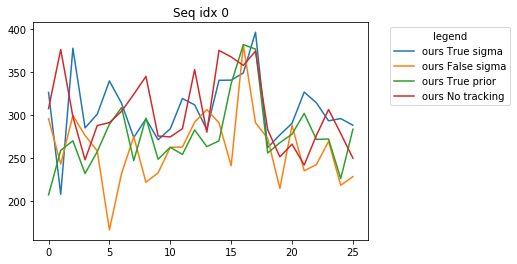

Here


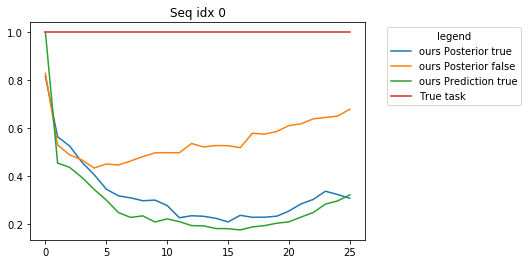

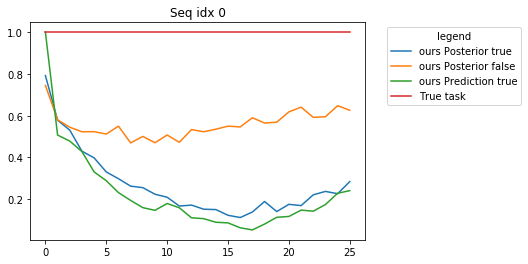

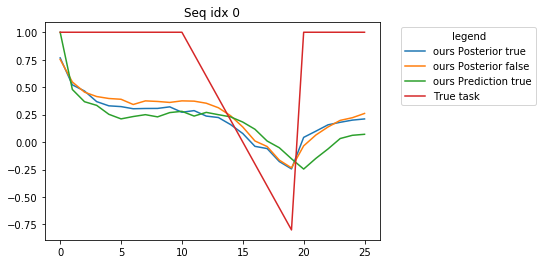

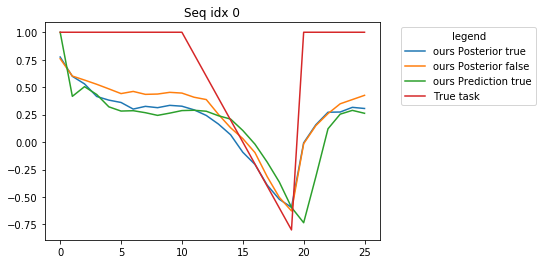

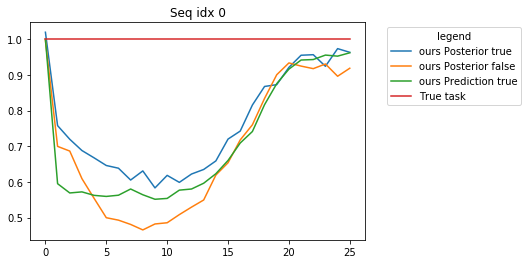

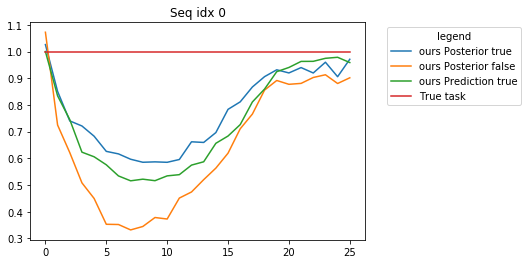

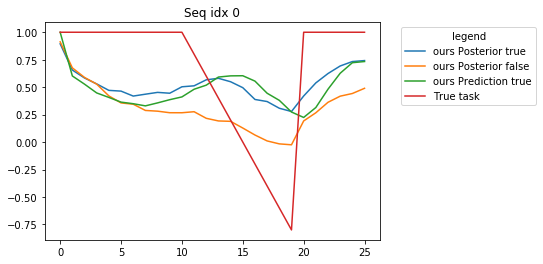

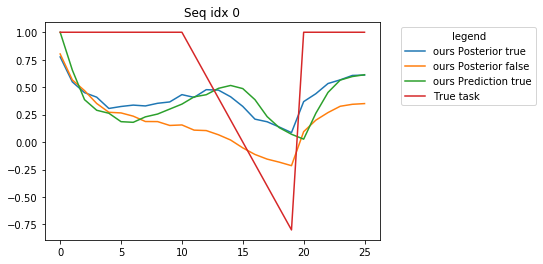

In [111]:
import gym_sin
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.ant_task_generator_adv import AntTaskGeneratorAdvanced
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args

import warnings

import pickle
objects = []
with (open("../result/metatest/ant2leglinearfocus/ours/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

warnings.filterwarnings(action='ignore')

folder = "result/metatest/ant/"
env_name = "gym_sin:antfrictionfull-v0"
# folder_list = ["result/ant2leg/ours/", "result/ant2leg/rl2/", "result/ant2leg/tsopt/"]
# algo_list = ['ours', 'rl2', 'ts_opt']
# label_list = ['ours', 'rl2', 'ts_opt']
# has_track_list = [True, False, True]
# store_history_list = [True, False, True]

folder_list = ["result/ant2leg/ours2leglat/"]
algo_list = ['ours']
label_list = ['ours']
has_track_list = [True]
store_history_list = [True]

# Task family parameters
friction_var_min_rnd = 0.3
friction_var_max_rnd = 0.5
friction_var_min_ok = 0.001
friction_var_max_ok = 0.1
noise_seq_var = 0.00001
latent_dim = 8
high_act = np.ones(8, dtype=np.float32)
low_act = -np.ones(8, dtype=np.float32)
action_space = spaces.Box(low=low_act, high=high_act)
prior_std_max = [friction_var_max_rnd ** (1 / 2) for _ in range(latent_dim)]
prior_std_min = [friction_var_min_ok ** (1 / 2) for _ in range(latent_dim)]

num_seq = 1
seq_len_list = [25]
sequence_name_list = ['deteriorate0']

def check_leg_cond_with_list(i, leg_idx_list):
    for leg in leg_idx_list:
        if leg == 0 and (i == 0 or i == 1):
            return True
        elif leg == 1 and (i == 2 or i == 3):
            return True
        elif leg == 2 and (i == 4 or i == 5):
            return True
        elif leg == 3 and (i == 6 or i == 7):
            return True
    return False


def get_decay_sequences(n_restarts, num_test_processes, var_seq, leg_idx_list, len):
    std = var_seq ** (1 / 2)
    kernel = C(1) * RBF(1) + WhiteKernel(0.05, noise_level_bounds="fixed") + DotProduct(1)
    gp_list = []

    for _ in range(latent_dim):
        curr_dim_list = []
        for _ in range(num_test_processes):
            curr_dim_list.append(GaussianProcessRegressor(kernel=kernel,
                                                          normalize_y=False,
                                                          n_restarts_optimizer=n_restarts))
        gp_list.append(curr_dim_list)

    # Creating prior distribution
    p_mean = []
    p_var = []
    for _ in range(latent_dim):
        p_mean.append(1)
        p_var.append(std ** 2)
    init_prior_test = [torch.tensor([p_mean, p_var], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    # Create prior sequence
    prior_seq = []
    for idx in range(len):
        p_mean = []
        p_var = []
        for i in range(latent_dim):
            if idx < 10 or idx >= 20:
                p_mean.append(1)
                p_var.append(std ** 2)
            elif 20 >= idx >= 10:
                if check_leg_cond_with_list(i=i, leg_idx_list=leg_idx_list):
                    p_mean.append(1 - (idx - 10) / 5)
                    p_var.append(std ** 2)
                else:
                    p_mean.append(1)
                    p_var.append(std ** 2)
        prior_seq.append(torch.tensor([p_mean, p_var], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test



def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_decay_1, prior_seq_decay_1, init_prior_decay_1 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[0, 1], len=25)
    gp_list_decay_2, prior_seq_decay_2, init_prior_decay_2 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[1, 2], len=25)
    gp_list_decay_3, prior_seq_decay_3, init_prior_decay_3 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[2, 3], len=25)
    gp_list_decay_4, prior_seq_decay_4, init_prior_decay_4 = get_decay_sequences(n_restarts, num_test_processes, std,
                                                                                 leg_idx_list=[1, 3], len=26)

    # Fill lists
    #p = [prior_seq_decay_1, prior_seq_decay_2, prior_seq_decay_3, prior_seq_decay_4]
    #gp = [gp_list_decay_1, gp_list_decay_2, gp_list_decay_3, gp_list_decay_4]
    #ip = [init_prior_decay_1, init_prior_decay_2, init_prior_decay_3, init_prior_decay_4]
    p = [prior_seq_decay_4]
    gp = [gp_list_decay_4]
    ip = [init_prior_decay_4]

    return p, gp, ip
         
         
# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=5,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
r = view_results_multiple_dim([o[0]], label_list, has_track_list, len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=None,
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=True,
                              num_dim=8)

In [141]:
400 * 16 * 15800 - 1e8

1120000.0

# Cheetah

Seq 0 Algo ts = -76.95178737066665 +- 46.52913947714471


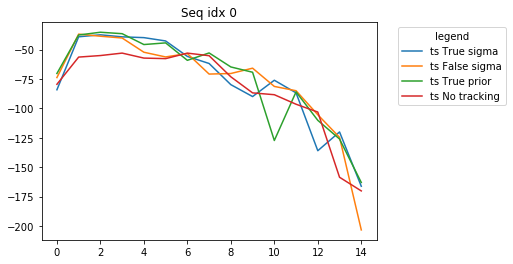

Here


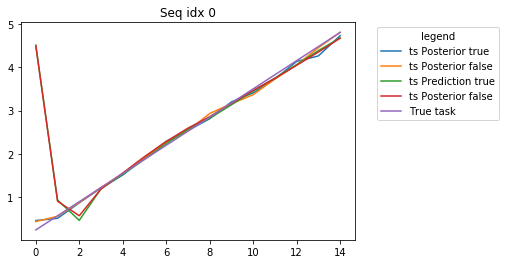

In [12]:
import pickle

import gym_sin
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.ant_task_generator_adv import AntTaskGeneratorAdvanced
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args

objects = []

with (open("../result/metatest/cheetah/ts/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

folder = "result/metatest/cheetah/"
env_name = "gym_sin:cheetahvel-v0"
folder_list = ["result/golf_fixed_final/ours/",
               "result/golf_fixed_final/tsopt/",
               "result/golf_fixed_final/rl2low/"]
algo_list = ['ours', 'ts_opt', 'rl2']
label_list = ['ours', 'ts_opt', 'rl2']
has_track_list = [True, True, False]
store_history_list = [True, True, False]
prior_var_min = 0.001
latent_dim = 1
prior_var_max = 0.2
noise_seq_var = 0.001
min_action = 1e-5
max_action = 10.
action_space = spaces.Box(low=min_action,
                          high=max_action,
                          shape=(1,))

num_seq = 1
seq_len_list = [15]
sequence_name_list = ['linear']


def f_linear(x, m=0.13, q=-0.9):
    return x * m + q


def get_linear_sequence(num_test_processes, n_restarts, std, seq_len):
    kernel = C(1) * RBF(1) + WhiteKernel(0.01, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(latent_dim):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[0.8], [0.1 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, seq_len):
        friction = f_linear(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_decay_1, prior_seq_decay_1, init_prior_decay_1 = get_linear_sequence(num_test_processes=num_test_processes,
                                                                                 std=std,
                                                                                 n_restarts=n_restarts,
                                                                                 seq_len=15)

    # Fill lists
    # p = [prior_seq_decay_1, prior_seq_decay_2, prior_seq_decay_3, prior_seq_decay_4]
    # gp = [gp_list_decay_1, gp_list_decay_2, gp_list_decay_3, gp_list_decay_4]
    # ip = [init_prior_decay_1, init_prior_decay_2, init_prior_decay_3, init_prior_decay_4]
    p = [prior_seq_decay_1]
    gp = [gp_list_decay_1]
    ip = [init_prior_decay_1]

    return p, gp, ip

# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=1,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
view_results_real([o[1]], ['ts'], [True], len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=[0, 5],
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=True)



Seq 0 Algo rl2 = -100.99677987466667 +- 79.80240367257007


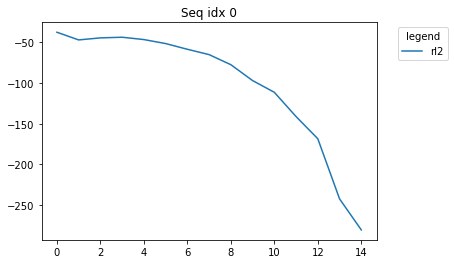

Here


In [13]:
import pickle

import gym_sin
import numpy as np
import torch
import os
from gym import spaces
from joblib import Parallel, delayed
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, DotProduct

from learner.ours import OursAgent
from learner.posterior_ts_opt import PosteriorOptTSAgent
from learner.recurrent import RL2
from task.ant_task_generator_adv import AntTaskGeneratorAdvanced
from utilities.folder_management import handle_folder_creation
from utilities.plots import view_results, create_csv_rewards, create_csv_tracking
from utilities.test_arguments import get_test_args

objects = []

with (open("../result/metatest/cheetah/rl2/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
o = objects[0]

folder = "result/metatest/cheetah/"
env_name = "gym_sin:cheetahvel-v0"
folder_list = ["result/golf_fixed_final/ours/",
               "result/golf_fixed_final/tsopt/",
               "result/golf_fixed_final/rl2low/"]
algo_list = ['ours', 'ts_opt', 'rl2']
label_list = ['ours', 'ts_opt', 'rl2']
has_track_list = [True, True, False]
store_history_list = [True, True, False]
prior_var_min = 0.001
latent_dim = 1
prior_var_max = 0.2
noise_seq_var = 0.001
min_action = 1e-5
max_action = 10.
action_space = spaces.Box(low=min_action,
                          high=max_action,
                          shape=(1,))

num_seq = 1
seq_len_list = [15]
sequence_name_list = ['linear']


def f_linear(x, m=0.13, q=-0.9):
    return x * m + q


def get_linear_sequence(num_test_processes, n_restarts, std, seq_len):
    kernel = C(1) * RBF(1) + WhiteKernel(0.01, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(latent_dim):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[0.8], [0.1 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, seq_len):
        friction = f_linear(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_decay_1, prior_seq_decay_1, init_prior_decay_1 = get_linear_sequence(num_test_processes=num_test_processes,
                                                                                 std=std,
                                                                                 n_restarts=n_restarts,
                                                                                 seq_len=15)

    # Fill lists
    # p = [prior_seq_decay_1, prior_seq_decay_2, prior_seq_decay_3, prior_seq_decay_4]
    # gp = [gp_list_decay_1, gp_list_decay_2, gp_list_decay_3, gp_list_decay_4]
    # ip = [init_prior_decay_1, init_prior_decay_2, init_prior_decay_3, init_prior_decay_4]
    p = [prior_seq_decay_1]
    gp = [gp_list_decay_1]
    ip = [init_prior_decay_1]

    return p, gp, ip

# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=1,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
view_results_real([o[-1]], ['rl2'], [False], len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=[0, 5],
             dump_data=False,
             save_fig=False,
             folder=folder_path_with_date,
             view_tracking=False)



In [4]:
import numpy as np
len_seq = 371
detach_every = 50
for i in range(int(np.ceil(len_seq / detach_every))):
    print("{}:{}".format(i*detach_every, i*detach_every+detach_every))
    #curr_input = h[i*detach_every:i*detach_every+detach_every]  # pytorch caps if we overflow, nice
    #curr_output, hidden_state = self.gru(curr_input, hidden_state)
    #output.append(curr_output)
    
    # detach hidden state; useful for BPTT when sequences are very long
    #hidden_state = hidden_state.detach()

0:50
50:100
100:150
150:200
200:250
250:300
300:350
350:400


In [7]:
import torch
t = torch.rand(16, 57, 15)
t[:, 50:60, :].shape

torch.Size([16, 7, 15])

0.1

In [1]:
from ppo_a2c.envs import get_vec_envs_multi_task

In [2]:
import gym_sin

In [7]:
kwargs_list = [{'friction':0} for _ in range(4)]
envs = get_vec_envs_multi_task(env_name='gauss-v0', 
                               seed=0, 
                               num_processes=4,
                               gamma=0.99,
                               log_dir='.', 
                               device="cpu", 
                               allow_early_resets=True, 
                               env_kwargs_list=kwargs_list,
                               use_vec_normalize=True,
                               envs=None)

In [13]:
envs.envs[0].set_latent(kwargs_list[0])